# Chargement des données

In [1]:
# mise en place des chemins des fichiers contenant les datasets
dossier_data = "data/brutes/"
nom_fichier_application_train = "application_train.csv"
nom_fichier_application_test = "application_test.csv"
nom_fichier_bureau = "bureau.csv"
nom_fichier_bureau_balance = "bureau_balance.csv"
nom_fichier_POS_CASH_balance = "POS_CASH_balance.csv"
nom_fichier_credit_card_balance = "credit_card_balance.csv"
nom_fichier_previous_application = "previous_application.csv"
nom_fichier_installments_payments = "installments_payments.csv"

In [2]:
import pandas as pd

# chargement des datasets (BDD complète)
application_train = pd.read_csv(dossier_data + nom_fichier_application_train)
application_test = pd.read_csv(dossier_data + nom_fichier_application_test)
bureau = pd.read_csv(dossier_data + nom_fichier_bureau)
#bureau_balance = pd.read_csv(dossier_data + nom_fichier_bureau_balance)
#POS_CASH_balance = pd.read_csv(dossier_data + nom_fichier_POS_CASH_balance)
#credit_card_balance = pd.read_csv(dossier_data + nom_fichier_credit_card_balance)
previous_application = pd.read_csv(dossier_data + nom_fichier_previous_application)
#installments_payments = pd.read_csv(dossier_data + nom_fichier_installments_payments)

In [3]:
pd.set_option("display.max_columns", None)
previous_application

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


Au vu des données, je ne vois pas comment utiliser les tables listant les mensualités des crédits précédents pour lesquelles peu d'infos sont disponibles (cf. *POS_CASH_balance*, *bureau_balance* et *installments_payments*). 

De ce fait, les tables qui semblent exploitables sont les suivantes :
- *application_{train|test}*
- *bureau*
- *previous_application*

Les autres ne seront plus chargées dans le notebook.

Avec les données des précédents crédits répertoriés par Credit Bureau, on pourrait voir :
- combien de crédits le client a eu => réel intérêt ? Seulement si on réalise un taux de nb de crédits avec retard de paiement sur nb de crédit, à voir si on a assez de données sur la table principale
- si le client a eu des retards de paiement et si oui de quel ordre
- combien de crédits le client a actuellement (donnée la plus importante parmi les 3)

Alors qu'avec les données des demandes précédentes de crédits faits à Home Credit, on pourrait voir :
- combien de crédits le client a eu
- combien de crédits le client a actuellement (donnée la plus importante parmi les 3)
- combien de demandes de crédit ont déjà été refusées au client par Home Credit

Ces données ne seront utilisées seulement dans le cas où j'ai un peu plus de temps. En effet, afin de réaliser la modélisation au plus vite, j'utiliserai dans un premier temps les données des demandes de crédit chez Home Credit.

# Préparation des données

## Précédents crédits répertoriés par Credit Bureau (partie à supprimer si pas eu le temps de faire du features engineering)

In [41]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


On regarde quelles sont les modalités correspondantes à la variable relative au statut du crédit pour savoir si on peut dire si un client a fait défaut de paiement. Etant donné que l'on ne sait pas pourquoi un crédit a été vendu (parce qu'il était mauvais ? Ou pour toute autre raison ?), on ne peut pas savoir dans ce dataset si un client a fait défaut de paiement.

In [33]:
bureau.CREDIT_ACTIVE.value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

Sur ce jeu de données, nous allons conserver les variables suivantes :
- SK_ID_CURR
- SK_ID_BUREAU
- CREDIT_ACTIVE
- CREDIT_DAY_OVERDUE
- AMT_CREDIT_SUM
- AMT_CREDIT_SUM_OVERDUE

Elles permettent de créer les données citées dans la partie précédente.

In [44]:
variables_a_conserver = [
    "SK_ID_CURR",
    "SK_ID_BUREAU",
    "CREDIT_ACTIVE",
    "CREDIT_DAY_OVERDUE",
    "AMT_CREDIT_SUM",
    "AMT_CREDIT_SUM_OVERDUE"
]
precedents_credits_CB = bureau[variables_a_conserver].copy()

In [45]:
precedents_credits_CB

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_OVERDUE
0,215354,5714462,Closed,0,91323.00,0.0
1,215354,5714463,Active,0,225000.00,0.0
2,215354,5714464,Active,0,464323.50,0.0
3,215354,5714465,Active,0,90000.00,0.0
4,215354,5714466,Active,0,2700000.00,0.0
...,...,...,...,...,...,...
1716423,259355,5057750,Active,0,11250.00,0.0
1716424,100044,5057754,Closed,0,38130.84,0.0
1716425,100044,5057762,Closed,0,15570.00,0.0
1716426,246829,5057770,Closed,0,36000.00,0.0


## Demandes de crédit en cours chez Home Credit

In [4]:
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
application_train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [7]:
application_train.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

Il faudra porter une attention particulière lors du split du dataset et de la suppression éventuelle de données car le dataset est déséquilibré.

### Sélection des variables

Les données conservées dans la table principale (train) sont les suivantes :
- *SK_ID_CURR* : ID du crédit
- *TARGET* : variable à expliquer, vaut 1 si le client a eu au moins un retard de paiement, 0 sinon 
- *NAME_CONTRACT_TYPE* : identifie si le crédit est en "cash" ou "revolving"
- *CODE_GENDER* : genre du client
- *FLAG_OWN_CAR* : flag si le client possède une voiture
- *FLAG_OWN_REALTY* : flag si le client possède une maison ou un appartement
- *CNT_CHILDREN* : nombre d'enfants du client
- *AMT_INCOME_TOTAL* : revenu du client
- *AMT_CREDIT* : montant du crédit
- *AMT_ANNUITY* : montant annuel à rembourser par le client
- *AMT_GOODS_PRICE* : si c'est un crédit à la consommation, montant des biens pour lequel le client fait crédit
- *NAME_INCOME_TYPE* : source de revenu du client (job, retraite, etc.)
- *NAME_EDUCATION_TYPE* : niveau de diplôme le plus élevé du client
- *NAME_FAMILY_STATUS* : statut familial du client (divorcé, marié, célibataire, etc.)
- *NAME_HOUSING_TYPE* : statut relatif au logement du client (propriétaire, locataire, hébergé, etc.) 
- *DAYS_BIRTH* : âge du client (en jours) au moment de la demande
- *DAYS_EMPLOYED* : durée de l'emploi du client en jours
- *OWN_CAR_AGE* : âge de la voiture du client (en années ?)
- *OCCUPATION_TYPE* : type d'activité du client
- *CNT_FAM_MEMBERS* : nombre de membres de la famille du client
- *ORGANIZATION_TYPE* : type de l'organisation dans laquelle le client travaille
- *OBS_30_CNT_SOCIAL_CIRCLE* : nombre de personnes de l'entourage du client avec un retard de paiement de 30 jours
- *DEF_30_CNT_SOCIAL_CIRCLE* : nombre de personnes de l'entourage du client en défaut de paiement à 30 jours
- *OBS_60_CNT_SOCIAL_CIRCLE* : nombre de personnes de l'entourage du client avec un retard de paiement de 60 jours
- *DEF_60_CNT_SOCIAL_CIRCLE* : nombre de personnes de l'entourage du client en défaut de paiement à 60 jours

In [8]:
# Conservation des variables d'entrée pour les modèles
variables_a_conserver = [
    "SK_ID_CURR",
    "TARGET",
    "NAME_CONTRACT_TYPE",
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    "DAYS_BIRTH",
    "DAYS_EMPLOYED",
    "OWN_CAR_AGE",
    "OCCUPATION_TYPE",
    "CNT_FAM_MEMBERS",
    "ORGANIZATION_TYPE",
    "OBS_30_CNT_SOCIAL_CIRCLE",
    "DEF_30_CNT_SOCIAL_CIRCLE",
    "OBS_60_CNT_SOCIAL_CIRCLE",
    "DEF_60_CNT_SOCIAL_CIRCLE"
]

credits = application_train[variables_a_conserver].copy()

In [9]:
credits

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,NaN,Laborers,1.0,Business Entity Type 3,2.0,2.0,2.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,NaN,Core staff,2.0,School,1.0,0.0,1.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,26.0,Laborers,1.0,Government,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,NaN,Laborers,2.0,Business Entity Type 3,2.0,0.0,2.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,NaN,Core staff,1.0,Religion,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,-9327,-236,NaN,Sales staff,1.0,Services,0.0,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-20775,365243,NaN,NaN,1.0,XNA,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,-14966,-7921,NaN,Managers,1.0,School,6.0,0.0,6.0,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-11961,-4786,NaN,Laborers,2.0,Business Entity Type 1,0.0,0.0,0.0,0.0


### Exploration des données catégorielles

In [10]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SK_ID_CURR                307511 non-null  int64  
 1   TARGET                    307511 non-null  int64  
 2   NAME_CONTRACT_TYPE        307511 non-null  object 
 3   CODE_GENDER               307511 non-null  object 
 4   FLAG_OWN_CAR              307511 non-null  object 
 5   FLAG_OWN_REALTY           307511 non-null  object 
 6   CNT_CHILDREN              307511 non-null  int64  
 7   AMT_INCOME_TOTAL          307511 non-null  float64
 8   AMT_CREDIT                307511 non-null  float64
 9   AMT_ANNUITY               307499 non-null  float64
 10  AMT_GOODS_PRICE           307233 non-null  float64
 11  NAME_INCOME_TYPE          307511 non-null  object 
 12  NAME_EDUCATION_TYPE       307511 non-null  object 
 13  NAME_FAMILY_STATUS        307511 non-null  o

In [95]:
# on affiche l'ensemble des résultats de la cellule et non pas uniquement le dernier d'entre eux
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

variables_dataset = credits.columns.values
for variable in variables_dataset:
    if credits[variable].dtypes == 'object':
        credits[variable].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

On observe des données manquantes dans les variables *CODE_GENDER* et *ORGANIZATION_TYPE* qui ont pour modalité "*XNA*".

### Données manquantes

In [11]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SK_ID_CURR                307511 non-null  int64  
 1   TARGET                    307511 non-null  int64  
 2   NAME_CONTRACT_TYPE        307511 non-null  object 
 3   CODE_GENDER               307511 non-null  object 
 4   FLAG_OWN_CAR              307511 non-null  object 
 5   FLAG_OWN_REALTY           307511 non-null  object 
 6   CNT_CHILDREN              307511 non-null  int64  
 7   AMT_INCOME_TOTAL          307511 non-null  float64
 8   AMT_CREDIT                307511 non-null  float64
 9   AMT_ANNUITY               307499 non-null  float64
 10  AMT_GOODS_PRICE           307233 non-null  float64
 11  NAME_INCOME_TYPE          307511 non-null  object 
 12  NAME_EDUCATION_TYPE       307511 non-null  object 
 13  NAME_FAMILY_STATUS        307511 non-null  o

#### Âge de la voiture

Presque 2/3 des données sont manquantes dans cette variable. Vérifions si cela vient bien du fait qu'un client n'a pas de voiture.

In [12]:
credits["FLAG_EMPTY_CAR_AGE"] = credits["OWN_CAR_AGE"].isnull()

In [98]:
analyse_age_voiture_vide = pd.crosstab(credits["FLAG_EMPTY_CAR_AGE"], credits["FLAG_OWN_CAR"], margins=True)
analyse_age_voiture_vide

FLAG_OWN_CAR,N,Y,All
FLAG_EMPTY_CAR_AGE,,,
False,0,104582,104582
True,202924,5,202929
All,202924,104587,307511


Presque la totalité des âges de voitures vides proviennent du fait que le client n'a pas de voiture, sauf pour 5 d'entre eux. Ces 5 clients seront supprimés.

In [13]:
index_a_supprimer = credits[(credits["FLAG_EMPTY_CAR_AGE"] == True) & (credits["FLAG_OWN_CAR"] == 'Y')].index
index_a_supprimer

Int64Index([30897, 181231, 217549, 229867, 236868], dtype='int64')

In [14]:
# suppression des clients ayant une voiture mais sans leur âge
credits.drop(index_a_supprimer, inplace=True)

In [15]:
credits.TARGET.value_counts()

0    282681
1     24825
Name: TARGET, dtype: int64

Afin d'avoir une variable sans donnée manquante, une nouvelle variable sera construite à partir du flag désignant le fait de posséder une voiture et de l'âge du véhicule.

#### Type de l'activité

Presque 1/3 des données sont manquantes dans cette variable. Vérifions si cela vient bien du fait qu'un client n'a pas de travail (chômage, retraite, congés longue durée, etc.).

In [16]:
# flag sur les données manquantes du type d'activité
credits["FLAG_EMPTY_OCCUPATION_TYPE"] = credits["OCCUPATION_TYPE"].isnull()

In [17]:
credits.NAME_INCOME_TYPE.value_counts()

Working                 158772
Commercial associate     71614
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [104]:
analyse_type_activite_vide = pd.crosstab(credits["FLAG_EMPTY_OCCUPATION_TYPE"], credits["NAME_INCOME_TYPE"], margins=True)
analyse_type_activite_vide

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working,All
FLAG_EMPTY_OCCUPATION_TYPE,,,,,,,,,
False,8,59318,4,5,17916,13,0,133852,211116
True,2,12296,1,55357,3787,5,22,24920,96390
All,10,71614,5,55362,21703,18,22,158772,307506


En effet, il y a bien des données manquantes sur le type de l'activité pour quasiment l'ensemble des retraités et des chômeurs. Cependant, il reste trop de données manquantes pour d'autres clients tels que les associés, les fonctionnaires ou les employés (*working*).

In [105]:
# on regarde si des tendances se dégagent dans d'autres variables
credits[credits["OCCUPATION_TYPE"].isnull()].sample(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_EMPTY_CAR_AGE,FLAG_EMPTY_OCCUPATION_TYPE
206145,338946,0,Cash loans,F,N,Y,1,180000.0,584766.0,23319.0,472500.0,Working,Secondary / secondary special,Married,House / apartment,-14194,-5654,NaN,NaN,3.0,School,0.0,0.0,0.0,0.0,True,True
273899,417506,0,Cash loans,F,N,Y,0,270000.0,1408140.0,130437.0,1354500.0,Pensioner,Higher education,Civil marriage,House / apartment,-20818,365243,NaN,NaN,2.0,XNA,1.0,0.0,1.0,0.0,True,True
220269,355170,0,Cash loans,M,Y,Y,0,63000.0,265500.0,12901.5,265500.0,State servant,Secondary / secondary special,Married,House / apartment,-19502,-4363,9.0,NaN,2.0,Industry: type 11,0.0,0.0,0.0,0.0,False,True
5670,106634,0,Cash loans,F,N,Y,0,270000.0,900000.0,45954.0,900000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21287,365243,NaN,NaN,2.0,XNA,4.0,1.0,4.0,0.0,True,True
30380,135257,0,Cash loans,M,Y,Y,0,261000.0,254700.0,27153.0,225000.0,Working,Secondary / secondary special,Married,House / apartment,-14646,-5420,4.0,NaN,2.0,Other,0.0,0.0,0.0,0.0,False,True
304794,453132,0,Cash loans,F,N,Y,0,225000.0,675000.0,32602.5,675000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22431,365243,NaN,NaN,2.0,XNA,3.0,0.0,3.0,0.0,True,True
82363,195522,0,Cash loans,F,Y,Y,1,202500.0,1081179.0,43006.5,927000.0,Working,Secondary / secondary special,Married,House / apartment,-10150,-869,3.0,NaN,3.0,Transport: type 4,1.0,0.0,1.0,0.0,False,True
35356,140953,0,Cash loans,F,N,Y,0,67500.0,158301.0,15552.0,148500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-24885,365243,NaN,NaN,2.0,XNA,3.0,0.0,3.0,0.0,True,True
148043,271653,0,Cash loans,F,N,N,0,135000.0,450000.0,35554.5,450000.0,Working,Higher education,Married,House / apartment,-10010,-1175,NaN,NaN,2.0,Self-employed,13.0,0.0,13.0,0.0,True,True
146223,269541,0,Cash loans,F,N,N,0,90000.0,900000.0,38263.5,900000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20925,365243,NaN,NaN,2.0,XNA,0.0,0.0,0.0,0.0,True,True


RAS sur le dataset réduit.

In [35]:
# on fait la même chose sur le dataset initial
application_train[application_train["OCCUPATION_TYPE"].isnull()].sample(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
120575,239804,0,Cash loans,F,N,Y,3,112500.0,594121.5,26167.5,472500.0,Family,Pensioner,Secondary / secondary special,Widow,House / apartment,0.010276,-20768,365243,-12151.0,-1099,NaN,1,0,0,1,0,0,NaN,4.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,XNA,0.277007,0.576165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
147313,270800,0,Cash loans,F,N,Y,0,247500.0,572148.0,41764.5,517500.0,Unaccompanied,Pensioner,Higher education,Married,House / apartment,0.016612,-18775,365243,-6344.0,-2322,NaN,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,XNA,0.841436,0.715011,0.342529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,5.0,1.0,-1934.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
199629,331430,0,Cash loans,F,N,Y,0,85500.0,110331.0,10876.5,103500.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.031329,-24619,365243,-2222.0,-4425,NaN,1,0,0,1,0,0,NaN,1.0,2,2,FRIDAY,10,0,0,0,0,0,0,XNA,0.848245,0.191526,0.819318,0.0495,NaN,0.9752,NaN,NaN,NaN,0.1034,0.1250,NaN,NaN,NaN,0.0385,NaN,0.0126,0.0504,NaN,0.9752,NaN,NaN,NaN,0.1034,0.1250,NaN,NaN,NaN,0.0402,NaN,0.0133,0.0500,NaN,0.9752,NaN,NaN,NaN,0.1034,0.1250,NaN,NaN,NaN,0.0392,NaN,0.0129,NaN,block of flats,0.0331,"Stone, brick",No,0.0,0.0,0.0,0.0,-1124.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
83453,196794,0,Cash loans,F,N,Y,0,90000.0,269550.0,19300.5,225000.0,Unaccompanied,Commercial associate,Secondary / 

RAS non plus sur le dataset initial.

Au vu du nombre de données manquantes non expliquées (environ 13% des clients), la variable sera supprimée. Je me servirai de la variable *NAME_INCOME_TYPE*.

In [18]:
# suppression de la variable
credits.drop(columns=["OCCUPATION_TYPE", "FLAG_EMPTY_OCCUPATION_TYPE"], inplace=True)

In [19]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307506 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SK_ID_CURR                307506 non-null  int64  
 1   TARGET                    307506 non-null  int64  
 2   NAME_CONTRACT_TYPE        307506 non-null  object 
 3   CODE_GENDER               307506 non-null  object 
 4   FLAG_OWN_CAR              307506 non-null  object 
 5   FLAG_OWN_REALTY           307506 non-null  object 
 6   CNT_CHILDREN              307506 non-null  int64  
 7   AMT_INCOME_TOTAL          307506 non-null  float64
 8   AMT_CREDIT                307506 non-null  float64
 9   AMT_ANNUITY               307494 non-null  float64
 10  AMT_GOODS_PRICE           307228 non-null  float64
 11  NAME_INCOME_TYPE          307506 non-null  object 
 12  NAME_EDUCATION_TYPE       307506 non-null  object 
 13  NAME_FAMILY_STATUS        307506 non-null  o

#### Genre du client

In [20]:
credits.CODE_GENDER.value_counts()

F      202445
M      105057
XNA         4
Name: CODE_GENDER, dtype: int64

Au vu du nombre de clients sans genre, je vais donc les supprimer.

In [21]:
# identification des clients concernés
index_a_supprimer = credits[credits["CODE_GENDER"] == 'XNA'].index
index_a_supprimer

Int64Index([35657, 38566, 83382, 189640], dtype='int64')

In [22]:
# suppression des clients n'ayant pas de genre
credits.drop(index_a_supprimer, inplace=True)

In [23]:
credits.TARGET.value_counts()

0    282677
1     24825
Name: TARGET, dtype: int64

#### Type d'organisation

In [24]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307502 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SK_ID_CURR                307502 non-null  int64  
 1   TARGET                    307502 non-null  int64  
 2   NAME_CONTRACT_TYPE        307502 non-null  object 
 3   CODE_GENDER               307502 non-null  object 
 4   FLAG_OWN_CAR              307502 non-null  object 
 5   FLAG_OWN_REALTY           307502 non-null  object 
 6   CNT_CHILDREN              307502 non-null  int64  
 7   AMT_INCOME_TOTAL          307502 non-null  float64
 8   AMT_CREDIT                307502 non-null  float64
 9   AMT_ANNUITY               307490 non-null  float64
 10  AMT_GOODS_PRICE           307224 non-null  float64
 11  NAME_INCOME_TYPE          307502 non-null  object 
 12  NAME_EDUCATION_TYPE       307502 non-null  object 
 13  NAME_FAMILY_STATUS        307502 non-null  o

Les clients sans organisation sont probablement les retraités.

In [25]:
credits.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38411
Other                     16682
Medicine                  11191
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6720
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [26]:
credits["FLAG_EMPTY_ORGANIZATION_TYPE"] = credits.ORGANIZATION_TYPE.apply(lambda x: 1 if x == 'XNA' else 0)

In [90]:
analyse_type_organisation_vide = pd.crosstab(credits["FLAG_EMPTY_ORGANIZATION_TYPE"], credits["NAME_INCOME_TYPE"], margins=True)
analyse_type_organisation_vide

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working,All
FLAG_EMPTY_ORGANIZATION_TYPE,,,,,,,,,
0,10,71613,5,10,21703,18,0,158769,252128
1,0,0,0,55352,0,0,22,0,55374
All,10,71613,5,55362,21703,18,22,158769,307502


L'ensemble des clients n'ayant pas d'organisation sont bien soit des retraités ou des chômeurs. Cependant au vu du nombre important de modalités et le fait que cette variable puisse être un facteur mineur (ou ne soit même pas un facteur) sur la variable à expliquer, celle-ci sera supprimée.

In [27]:
# suppression de la variable
credits.drop(columns=["ORGANIZATION_TYPE", "FLAG_EMPTY_ORGANIZATION_TYPE"], inplace=True)

In [28]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307502 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SK_ID_CURR                307502 non-null  int64  
 1   TARGET                    307502 non-null  int64  
 2   NAME_CONTRACT_TYPE        307502 non-null  object 
 3   CODE_GENDER               307502 non-null  object 
 4   FLAG_OWN_CAR              307502 non-null  object 
 5   FLAG_OWN_REALTY           307502 non-null  object 
 6   CNT_CHILDREN              307502 non-null  int64  
 7   AMT_INCOME_TOTAL          307502 non-null  float64
 8   AMT_CREDIT                307502 non-null  float64
 9   AMT_ANNUITY               307490 non-null  float64
 10  AMT_GOODS_PRICE           307224 non-null  float64
 11  NAME_INCOME_TYPE          307502 non-null  object 
 12  NAME_EDUCATION_TYPE       307502 non-null  object 
 13  NAME_FAMILY_STATUS        307502 non-null  o

#### Cercle social en retard/défaut de paiement

In [120]:
filtre_30j = (credits["OBS_30_CNT_SOCIAL_CIRCLE"].isnull()) | (credits["DEF_30_CNT_SOCIAL_CIRCLE"].isnull())
filtre_60j = (credits["OBS_60_CNT_SOCIAL_CIRCLE"].isnull()) | (credits["DEF_60_CNT_SOCIAL_CIRCLE"].isnull())
credits[filtre_30j | filtre_60j]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_EMPTY_CAR_AGE
68,100080,0,Revolving loans,F,N,N,1,157500.0,450000.0,22500.0,450000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11956,-3154,NaN,3.0,NaN,NaN,NaN,NaN,True
394,100457,0,Revolving loans,F,Y,Y,0,211500.0,270000.0,13500.0,270000.0,Working,Higher education,Single / not married,House / apartment,-8922,-728,7.0,1.0,NaN,NaN,NaN,NaN,False
397,100460,0,Revolving loans,F,N,N,0,315000.0,540000.0,27000.0,540000.0,Commercial associate,Higher education,Single / not married,Rented apartment,-9842,-157,NaN,1.0,NaN,NaN,NaN,NaN,True
457,100527,0,Revolving loans,F,N,N,0,112500.0,270000.0,13500.0,270000.0,Commercial associate,Higher education,Civil marriage,House / apartment,-9393,-992,NaN,2.0,NaN,NaN,NaN,NaN,True
1042,101209,0,Revolving loans,M,Y,N,0,180000.0,540000.0,27000.0,540000.0,Commercial associate,Higher education,Married,House / apartment,-18800,-5516,7.0,2.0,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305526,453980,0,Revolving loans,F,Y,Y,2,72000.0,225000.0,11250.0,225000.0,Working,Secondary / secondary special,Married,House / apartment,-14981,-2205,1.0,4.0,NaN,NaN,NaN,NaN,False
305623,454093,0,Revolving loans,M,Y,Y,2,90000.0,202500.0,10125.0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-16306,-678,2.0,4.0,NaN,NaN,NaN,NaN,False
305641,454116,0,Revolving loans,F,N,N,0,270000.0,765000.0,38250.0,765000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22587,365243,NaN,1.0,NaN,NaN,NaN,NaN,True
305642,454117,0,Revolving loans,F,Y,Y,1,202500.0,765000.0,38250.0,765000.0,State servant,Higher education,Married,House / apartment,-13752,-5205,2.0,3.0,NaN,NaN,NaN,NaN,False


Les 4 variables relatives au cercle social avec retard/défaut de paiement vides simultanément, cela concerne 1021 clients. Etant donné la volumétrie, ces clients seront donc écartés du dataset (<1% des clients).

In [29]:
# identification des clients concernés
index_a_supprimer = credits[credits["OBS_30_CNT_SOCIAL_CIRCLE"].isnull()].index
index_a_supprimer

Int64Index([    68,    394,    397,    457,   1042,   1064,   1156,   1209,
              1486,   1743,
            ...
            304671, 304677, 305147, 305176, 305365, 305526, 305623, 305641,
            305642, 307402],
           dtype='int64', length=1021)

In [122]:
credits.TARGET.value_counts()

0    282677
1     24825
Name: TARGET, dtype: int64

In [30]:
# on regarde combien de clients avec un retard de paiement sont concernés
credits.loc[index_a_supprimer, :].TARGET.value_counts()

0    985
1     36
Name: TARGET, dtype: int64

In [31]:
# suppression des clients n'ayant pas de données sur leur cercle social
credits.drop(index_a_supprimer, inplace=True)

In [32]:
credits.TARGET.value_counts()

0    281692
1     24789
Name: TARGET, dtype: int64

In [33]:
credits.TARGET.value_counts(normalize=True)

0    0.919117
1    0.080883
Name: TARGET, dtype: float64

In [130]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306481 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SK_ID_CURR                306481 non-null  int64  
 1   TARGET                    306481 non-null  int64  
 2   NAME_CONTRACT_TYPE        306481 non-null  object 
 3   CODE_GENDER               306481 non-null  object 
 4   FLAG_OWN_CAR              306481 non-null  object 
 5   FLAG_OWN_REALTY           306481 non-null  object 
 6   CNT_CHILDREN              306481 non-null  int64  
 7   AMT_INCOME_TOTAL          306481 non-null  float64
 8   AMT_CREDIT                306481 non-null  float64
 9   AMT_ANNUITY               306469 non-null  float64
 10  AMT_GOODS_PRICE           306203 non-null  float64
 11  NAME_INCOME_TYPE          306481 non-null  object 
 12  NAME_EDUCATION_TYPE       306481 non-null  object 
 13  NAME_FAMILY_STATUS        306481 non-null  o

#### Montant des prix de biens concernés par le crédit

In [131]:
credits.AMT_GOODS_PRICE.describe()

count    3.062030e+05
mean     5.386768e+05
std      3.694582e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [132]:
credits[credits["AMT_GOODS_PRICE"].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_EMPTY_CAR_AGE
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,-10072,-381,NaN,4.0,2.0,1.0,2.0,1.0,True
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500.0,NaN,Working,Secondary / secondary special,Married,House / apartment,-11993,-2921,NaN,2.0,0.0,0.0,0.0,0.0,True
6425,107494,0,Revolving loans,F,N,N,0,67500.0,202500.0,10125.0,NaN,Working,Higher education,Married,House / apartment,-9727,-2712,NaN,2.0,1.0,1.0,1.0,0.0,True
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000.0,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,-11079,-899,NaN,3.0,1.0,0.0,1.0,0.0,True
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500.0,NaN,Working,Higher education,Single / not married,House / apartment,-9986,-1847,NaN,1.0,1.0,0.0,1.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304678,452992,0,Revolving loans,F,N,Y,2,67500.0,202500.0,10125.0,NaN,Working,Higher education,Married,House / apartment,-11313,-1470,NaN,4.0,3.0,1.0,3.0,0.0,True
304784,453120,0,Revolving loans,M,N,Y,1,112500.0,270000.0,13500.0,NaN,Working,Secondary / secondary special,Married,House / apartment,-16870,-825,NaN,3.0,3.0,1.0,3.0,1.0,True
305833,454341,0,Revolving loans,F,N,Y,0,126000.0,270000.0,13500.0,NaN,Working,Incomplete higher,Single / not married,With parents,-10440,-3444,NaN,1.0,2.0,0.0,2.0,0.0,True
306126,454683,0,Revolving loans,M,N,Y,0,135000.0,270000.0,13500.0,NaN,Commercial associate,Secondary / secondary special,Married,Municipal apartment,-15406,-427,NaN,2.0,0.0,0.0,0.0,0.0,True


In [34]:
credits[credits["AMT_GOODS_PRICE"].isnull()].NAME_CONTRACT_TYPE.value_counts()

Revolving loans    278
Name: NAME_CONTRACT_TYPE, dtype: int64

In [35]:
credits.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278226
Revolving loans     28255
Name: NAME_CONTRACT_TYPE, dtype: int64

Même dans les données non sélectionnées, aucune autre variable ne peut donner plus d'information sur le fait que le montant des biens soit vides. Par exemple, je n'ai pas trouvé de donnée relative au type de biens, ou à la raison du crédit. De ce fait, je supprime les clients concernés (<1% des clients).

In [36]:
# identification des clients concernés
index_a_supprimer = credits[credits["AMT_GOODS_PRICE"].isnull()].index
index_a_supprimer

Int64Index([   724,   5937,   6425,   6703,   7647,   7880,   7995,  10819,
             11287,  13008,
            ...
            300107, 302923, 303603, 303621, 304621, 304678, 304784, 305833,
            306126, 306273],
           dtype='int64', length=278)

In [135]:
credits.TARGET.value_counts()

0    281692
1     24789
Name: TARGET, dtype: int64

In [37]:
# on regarde combien de clients avec un retard de paiement sont concernés
credits.loc[index_a_supprimer, :].TARGET.value_counts()

0    257
1     21
Name: TARGET, dtype: int64

In [38]:
# suppression des clients n'ayant pas de montant sur leurs biens concernés par le crédit
credits.drop(index_a_supprimer, inplace=True)

In [39]:
credits.TARGET.value_counts()

0    281435
1     24768
Name: TARGET, dtype: int64

In [40]:
credits.TARGET.value_counts(normalize=True)

0    0.919112
1    0.080888
Name: TARGET, dtype: float64

In [41]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306203 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SK_ID_CURR                306203 non-null  int64  
 1   TARGET                    306203 non-null  int64  
 2   NAME_CONTRACT_TYPE        306203 non-null  object 
 3   CODE_GENDER               306203 non-null  object 
 4   FLAG_OWN_CAR              306203 non-null  object 
 5   FLAG_OWN_REALTY           306203 non-null  object 
 6   CNT_CHILDREN              306203 non-null  int64  
 7   AMT_INCOME_TOTAL          306203 non-null  float64
 8   AMT_CREDIT                306203 non-null  float64
 9   AMT_ANNUITY               306191 non-null  float64
 10  AMT_GOODS_PRICE           306203 non-null  float64
 11  NAME_INCOME_TYPE          306203 non-null  object 
 12  NAME_EDUCATION_TYPE       306203 non-null  object 
 13  NAME_FAMILY_STATUS        306203 non-null  o

#### Montant des annuités

In [143]:
credits[credits["AMT_ANNUITY"].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_EMPTY_CAR_AGE
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10668,-2523,NaN,1.0,1.0,0.0,1.0,0.0,True
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Working,Lower secondary,Civil marriage,House / apartment,-9027,-1270,NaN,2.0,0.0,0.0,0.0,0.0,True
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Working,Secondary / secondary special,Married,House / apartment,-17376,-3950,NaN,2.0,1.0,0.0,1.0,0.0,True
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,State servant,Higher education,Married,House / apartment,-11329,-2040,NaN,2.0,0.0,0.0,0.0,0.0,True
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19762,-2498,4.0,1.0,0.0,0.0,0.0,0.0,False
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Working,Higher education,Single / not married,Rented apartment,-20831,-2450,8.0,1.0,0.0,0.0,0.0,0.0,False
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,State servant,Secondary / secondary special,Married,House / apartment,-12134,-3721,2.0,2.0,0.0,0.0,0.0,0.0,False
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,720000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13902,-3540,NaN,2.0,0.0,0.0,0.0,0.0,True
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,486000.0,Commercial associate,Higher education,Married,House / apartment,-10151,-472,NaN,2.0,0.0,0.0,0.0,0.0,True
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,499500.0,Commercial associate,Higher education,Married,Municipal apartment,-16344,-1478,NaN,2.0,1.0,0.0,1.0,0.0,True


Etant donné leur nombre, je supprime cette douzaine de clients du dataset. 

In [42]:
# identification des clients concernés
index_a_supprimer = credits[credits["AMT_ANNUITY"].isnull()].index
index_a_supprimer

Int64Index([ 47531,  50035,  51594,  55025,  59934,  75873,  89343, 123872,
            207186, 227939, 239329, 241835],
           dtype='int64')

In [43]:
# suppression des clients n'ayant pas de montant d'annuité
credits.drop(index_a_supprimer, inplace=True)

In [44]:
credits.TARGET.value_counts()

0    281423
1     24768
Name: TARGET, dtype: int64

In [45]:
credits.TARGET.value_counts(normalize=True)

0    0.919109
1    0.080891
Name: TARGET, dtype: float64

In [46]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306191 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SK_ID_CURR                306191 non-null  int64  
 1   TARGET                    306191 non-null  int64  
 2   NAME_CONTRACT_TYPE        306191 non-null  object 
 3   CODE_GENDER               306191 non-null  object 
 4   FLAG_OWN_CAR              306191 non-null  object 
 5   FLAG_OWN_REALTY           306191 non-null  object 
 6   CNT_CHILDREN              306191 non-null  int64  
 7   AMT_INCOME_TOTAL          306191 non-null  float64
 8   AMT_CREDIT                306191 non-null  float64
 9   AMT_ANNUITY               306191 non-null  float64
 10  AMT_GOODS_PRICE           306191 non-null  float64
 11  NAME_INCOME_TYPE          306191 non-null  object 
 12  NAME_EDUCATION_TYPE       306191 non-null  object 
 13  NAME_FAMILY_STATUS        306191 non-null  o

### Outliers

In [49]:
credits.reset_index(drop=True, inplace=True)

In [50]:
credits

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_EMPTY_CAR_AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,NaN,1.0,2.0,2.0,2.0,2.0,True
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,NaN,2.0,1.0,0.0,1.0,0.0,True
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,26.0,1.0,0.0,0.0,0.0,0.0,False
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,NaN,2.0,2.0,0.0,2.0,0.0,True
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,NaN,1.0,0.0,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306186,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,-9327,-236,NaN,1.0,0.0,0.0,0.0,0.0,True
306187,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-20775,365243,NaN,1.0,0.0,0.0,0.0,0.0,True
306188,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,-14966,-7921,NaN,1.0,6.0,0.0,6.0,0.0,True
306189,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-11961,-4786,NaN,2.0,0.0,0.0,0.0,0.0,True


In [57]:
# sélection des variables quantitatives
variables_dataset = credits.columns.values
variables_quantitatives = []

for variable in variables_dataset:
    if variable not in ['SK_ID_CURR', 'TARGET'] and credits[variable].dtypes not in ['object', 'bool']:
        variables_quantitatives.append(variable)

In [62]:
credits[variables_quantitatives]

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,0,202500.0,406597.5,24700.5,351000.0,-9461,-637,NaN,1.0,2.0,2.0,2.0,2.0
1,0,270000.0,1293502.5,35698.5,1129500.0,-16765,-1188,NaN,2.0,1.0,0.0,1.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,-19046,-225,26.0,1.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,-19005,-3039,NaN,2.0,2.0,0.0,2.0,0.0
4,0,121500.0,513000.0,21865.5,513000.0,-19932,-3038,NaN,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306186,0,157500.0,254700.0,27558.0,225000.0,-9327,-236,NaN,1.0,0.0,0.0,0.0,0.0
306187,0,72000.0,269550.0,12001.5,225000.0,-20775,365243,NaN,1.0,0.0,0.0,0.0,0.0
306188,0,153000.0,677664.0,29979.0,585000.0,-14966,-7921,NaN,1.0,6.0,0.0,6.0,0.0
306189,0,171000.0,370107.0,20205.0,319500.0,-11961,-4786,NaN,2.0,0.0,0.0,0.0,0.0


In [64]:
credits[variables_quantitatives].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306191.000000,3.061910e+05,3.061910e+05,306191.000000,3.061910e+05,306191.000000,306191.000000,104214.000000,306191.000000,306191.000000,306191.000000,306191.000000,306191.000000
mean,0.417096,1.686630e+05,5.998014e+05,27135.097454,5.386780e+05,-16039.802169,63867.287562,12.061614,2.152940,1.422396,0.143407,1.405450,0.100032
std,0.722197,2.373654e+05,4.025799e+05,14477.510187,3.694602e+05,4363.508856,141319.531539,11.930616,0.910662,2.401126,0.446625,2.379952,0.362211
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16573.500000,2.385000e+05,-19684.000000,-2760.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.462500e+05,5.175000e+05,24939.000000,4.500000e+05,-15753.000000,-1213.000000,9.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.025000e+05,8.086500e+05,34600.500000,6.795000e+05,-12416.000000,-289.000000,15.000000,3.000000,2.000000,0.000000,2.000000,0.000000
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,91.000000,20.000000,348.000000,34.000000,344.000000,24.000000


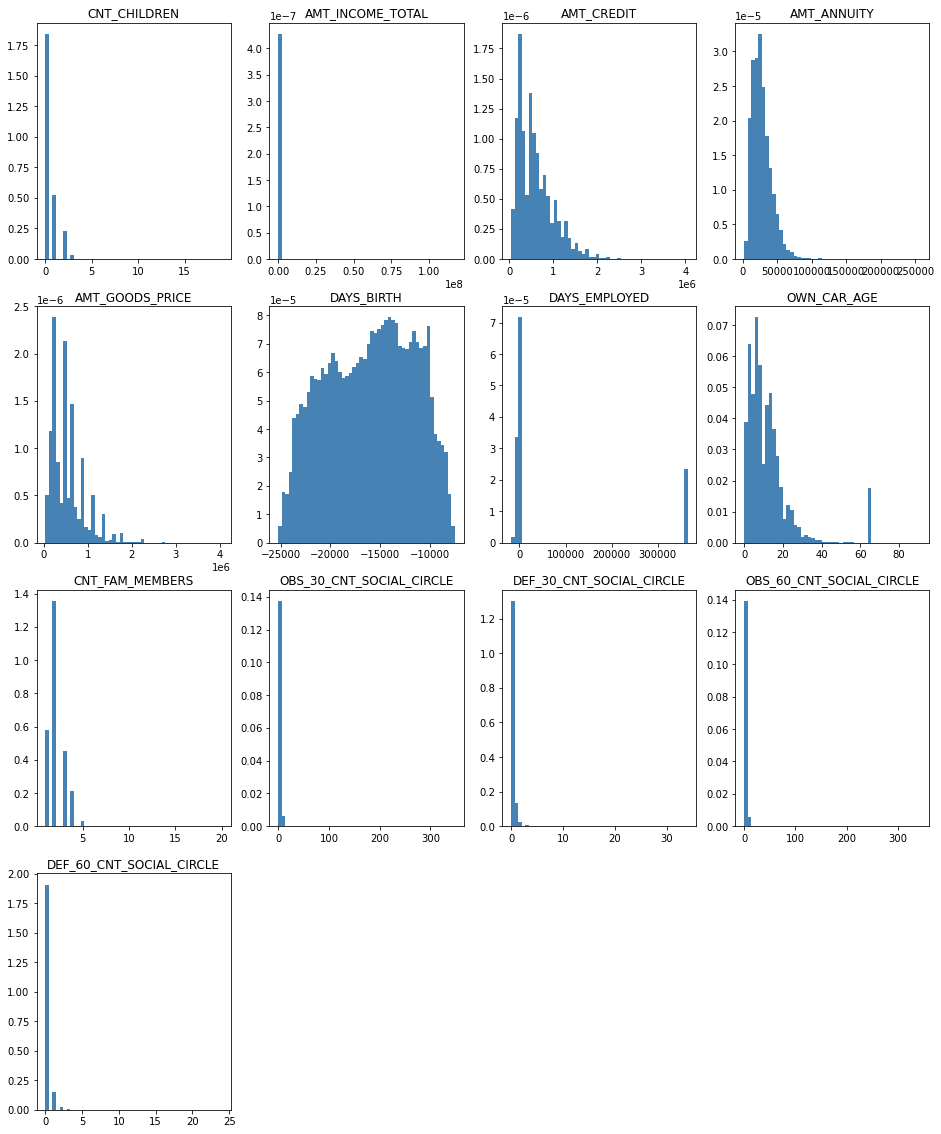

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

# visualisation des variables quantitatives
fig = plt.figure(figsize=(16, 20))
for indice_colonne in range(credits[variables_quantitatives].shape[1]):
    ax = fig.add_subplot(4, 4, (indice_colonne+1))
    nom_colonne = credits[variables_quantitatives].iloc[:, indice_colonne].name
    h = ax.hist(credits[variables_quantitatives].iloc[:, indice_colonne], bins=50, color='steelblue', 
                density=True, edgecolor='none')
    ax.set_title(nom_colonne, fontsize=12)

#### Retravail des variables âge et durée d'emploi

In [66]:
# calcul de l'âge du client
credits['CLIENT_AGE'] = round(-credits['DAYS_BIRTH']/365, 0)

Il est difficile d'analyser les variables en question et de savoir si elles sont effectivement des outliers même si on peut avoir une petite idée pour la durée d'emploi. En effet, le nombre max est positif et de l'ordre de 10<sup>6</sup>, ce qui laisse penser que ce nombre est attribué aux personnes sans emploi tels les retraités ou les chômeurs.

In [73]:
credits['CLIENT_AGE']

0         26.0
1         46.0
2         52.0
3         52.0
4         55.0
          ... 
306186    26.0
306187    57.0
306188    41.0
306189    33.0
306190    46.0
Name: CLIENT_AGE, Length: 306191, dtype: float64

In [69]:
# on vérifie si le nombre max de la durée d'emploi correspond bien à des personnes sans emploi
credits[credits['DAYS_EMPLOYED']==365243]['NAME_INCOME_TYPE'].value_counts()

Pensioner     55161
Unemployed       19
Name: NAME_INCOME_TYPE, dtype: int64

In [70]:
# on vérifie si la durée d'emploi peut être égale à 0
credits[credits['DAYS_EMPLOYED']==0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_EMPTY_CAR_AGE,CLIENT_AGE
23591,127568,0,Cash loans,F,N,N,2,189000.0,983299.5,36571.5,904500.0,Working,Higher education,Separated,House / apartment,-12609,0,NaN,3.0,0.0,0.0,0.0,0.0,True,35.0
121108,241013,1,Cash loans,F,N,Y,1,112500.0,134775.0,7438.5,112500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15053,0,NaN,3.0,0.0,0.0,0.0,0.0,True,41.0


In [71]:
# on vérifie si la durée d'emploi peut être positive mais différent de 365243
credits[(credits['DAYS_EMPLOYED']>0) & (credits['DAYS_EMPLOYED']!=365243)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_EMPTY_CAR_AGE,CLIENT_AGE


On va donc appliquer la formule pour ramener la valeur à l'année et non au jour. Il y aura besoin d'appliquer du feature engineering sur cette variable pour qu'elle soit exploitable.

In [72]:
# calcul de la durée d'emploi en année
credits['EMPLOYMENT_DURATION'] = round(-credits['DAYS_EMPLOYED']/365, 0)

In [74]:
credits['EMPLOYMENT_DURATION']

0            2.0
1            3.0
2            1.0
3            8.0
4            8.0
           ...  
306186       1.0
306187   -1001.0
306188      22.0
306189      13.0
306190       3.0
Name: EMPLOYMENT_DURATION, Length: 306191, dtype: float64

In [75]:
# ajout des nouvelles variables créées et suppression des anciennes variables concernées
variables_quantitatives.append('CLIENT_AGE')
variables_quantitatives.append('EMPLOYMENT_DURATION')
variables_quantitatives.remove('DAYS_BIRTH')
variables_quantitatives.remove('DAYS_EMPLOYED')
variables_quantitatives

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'CLIENT_AGE',
 'EMPLOYMENT_DURATION']

In [76]:
len(variables_quantitatives)

13

In [77]:
credits[variables_quantitatives].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,OWN_CAR_AGE,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,CLIENT_AGE,EMPLOYMENT_DURATION
count,306191.000000,3.061910e+05,3.061910e+05,306191.000000,3.061910e+05,104214.000000,306191.000000,306191.000000,306191.000000,306191.000000,306191.000000,306191.000000,306191.000000
mean,0.417096,1.686630e+05,5.998014e+05,27135.097454,5.386780e+05,12.061614,2.152940,1.422396,0.143407,1.405450,0.100032,43.946409,-175.038551
std,0.722197,2.373654e+05,4.025799e+05,14477.510187,3.694602e+05,11.930616,0.910662,2.401126,0.446625,2.379952,0.362211,11.962657,387.305587
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,21.000000,-1001.000000
25%,0.000000,1.125000e+05,2.700000e+05,16573.500000,2.385000e+05,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1.000000
50%,0.000000,1.462500e+05,5.175000e+05,24939.000000,4.500000e+05,9.000000,2.000000,0.000000,0.000000,0.000000,0.000000,43.000000,3.000000
75%,1.000000,2.025000e+05,8.086500e+05,34600.500000,6.795000e+05,15.000000,3.000000,2.000000,0.000000,2.000000,0.000000,54.000000,8.000000
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,91.000000,20.000000,348.000000,34.000000,344.000000,24.000000,69.000000,49.000000


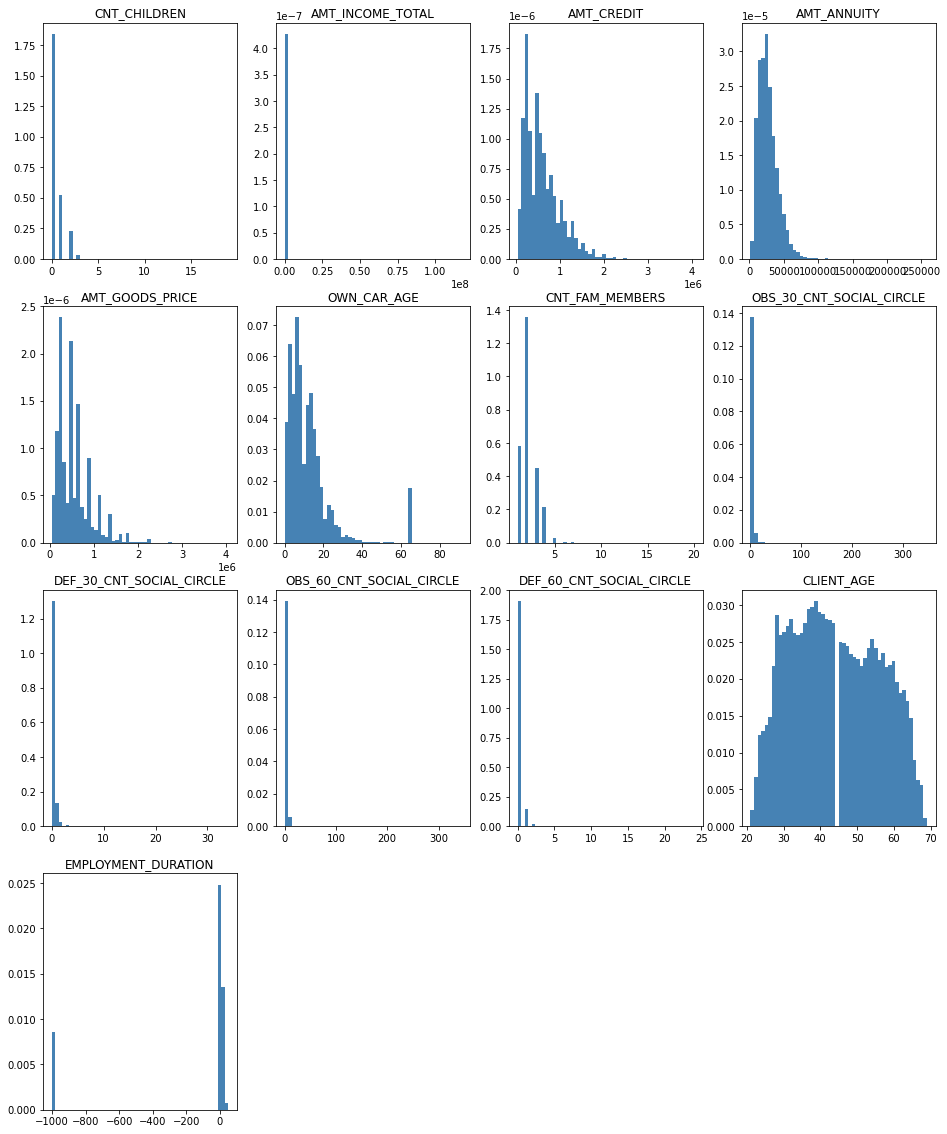

In [78]:
# visualisation des variables quantitatives
fig = plt.figure(figsize=(16, 20))
for indice_colonne in range(credits[variables_quantitatives].shape[1]):
    ax = fig.add_subplot(4, 4, (indice_colonne+1))
    nom_colonne = credits[variables_quantitatives].iloc[:, indice_colonne].name
    h = ax.hist(credits[variables_quantitatives].iloc[:, indice_colonne], bins=50, color='steelblue', 
                density=True, edgecolor='none')
    ax.set_title(nom_colonne, fontsize=12)

In [82]:
credits['CLIENT_AGE'].value_counts().sort_index()

21.0     636
22.0    1956
23.0    3649
24.0    3797
25.0    4054
26.0    4339
27.0    6381
28.0    8417
29.0    7611
30.0    7746
31.0    7983
32.0    8285
33.0    7708
34.0    7636
35.0    7712
36.0    8123
37.0    8686
38.0    8751
39.0    8983
40.0    8556
41.0    8458
42.0    8275
43.0    8234
44.0    8100
45.0    7347
46.0    7300
47.0    7174
48.0    6884
49.0    6759
50.0    6662
51.0    6392
52.0    6717
53.0    7106
54.0    7456
55.0    7106
56.0    6620
57.0    6903
58.0    6348
59.0    6451
60.0    6589
61.0    5771
62.0    5333
63.0    5442
64.0    5003
65.0    4309
66.0    2641
67.0    1834
68.0    1654
69.0     314
Name: CLIENT_AGE, dtype: int64

Il n'y a pas de valeur manquante dans l'âge malgré ce qu'affiche le graphique.

#### Identification des outliers

In [93]:
def identifier_outliers(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    ecart_interquartile = Q3 - Q1
    seuil_inferieur = Q1 - 1.5 * ecart_interquartile
    seuil_superieur = Q3 + 1.5 * ecart_interquartile
    return credits[(serie < seuil_inferieur) | (serie > seuil_superieur)].index

In [111]:
# on identifie si le client est un outlier sur chaque variable quanti
credits['IS_OUTLIER'] = 0

for variable in variables_quantitatives:
    if variable == 'EMPLOYMENT_DURATION':
        index_outliers = identifier_outliers(credits[variable].where(credits[variable]!=-1001))
    else:
        index_outliers = identifier_outliers(credits[variable])
    credits.loc[index_outliers, 'IS_OUTLIER'] = 1

In [112]:
credits.IS_OUTLIER.value_counts()

0    215116
1     91075
Name: IS_OUTLIER, dtype: int64

Avec la méthode de 1,5 * l'écart interquartile, on se retrouve avec près d'1/3 des clients étant outlier sur au moins une variable quanti. Je ne les supprime donc pas, je vais plutôt chercher à procéder autrement.

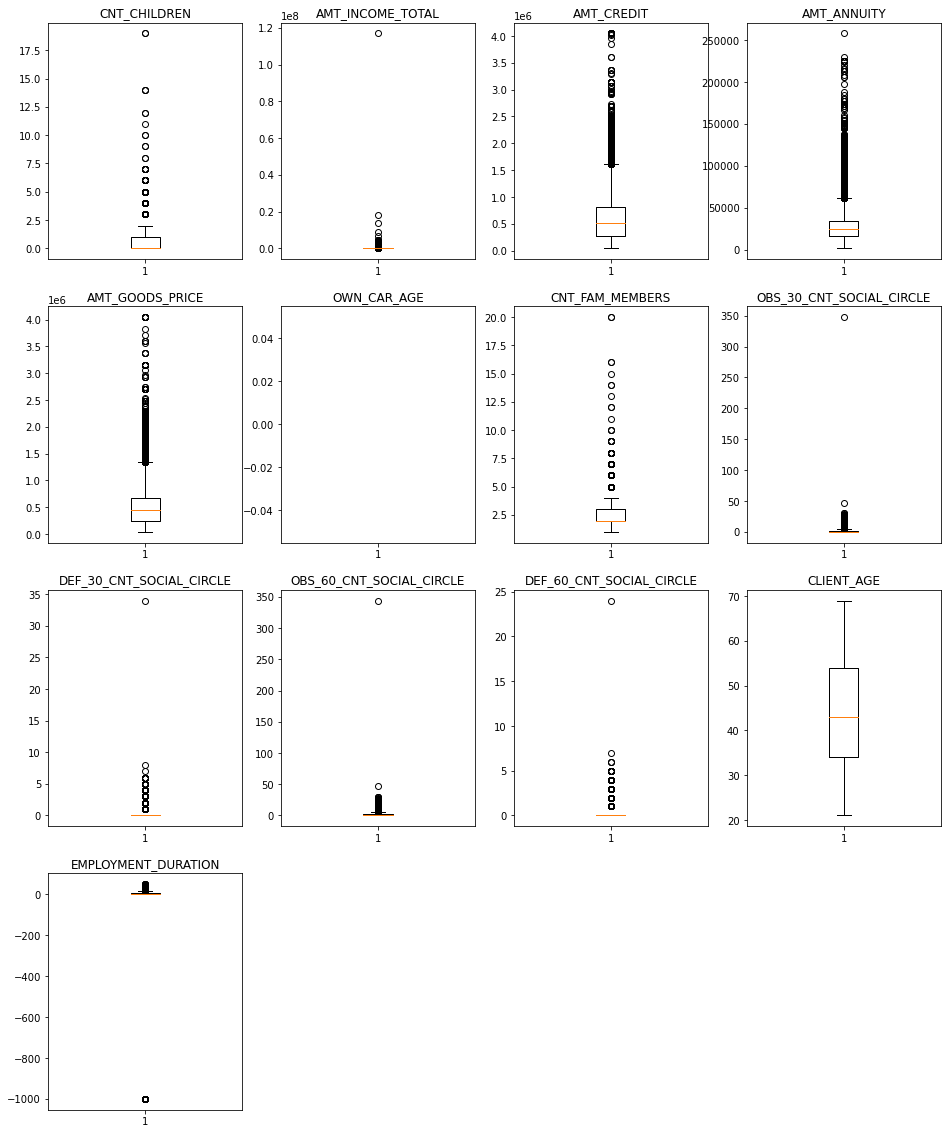

In [116]:
# visualisation des boxplots des variables quantitatives
fig = plt.figure(figsize=(16, 20))
for indice_colonne in range(credits[variables_quantitatives].shape[1]):
    ax = fig.add_subplot(4, 4, (indice_colonne+1))
    nom_colonne = credits[variables_quantitatives].iloc[:, indice_colonne].name
    b = ax.boxplot(credits[variables_quantitatives].iloc[:, indice_colonne])
    ax.set_title(nom_colonne, fontsize=12)

<AxesSubplot:xlabel='EMPLOYMENT_DURATION'>

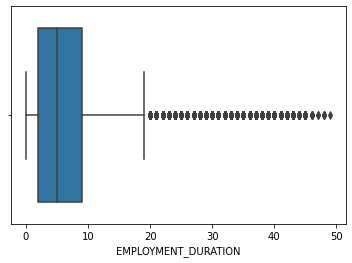

In [119]:
import seaborn as sns

sns.boxplot(x=credits[credits['EMPLOYMENT_DURATION'] != -1001].loc[:, 'EMPLOYMENT_DURATION'])

<AxesSubplot:xlabel='OWN_CAR_AGE'>

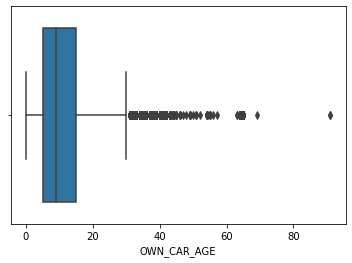

In [161]:
sns.boxplot(x=credits[credits['OWN_CAR_AGE'] != -1001].loc[:, 'OWN_CAR_AGE'])

Je vais supprimer les clients ayant les valeurs les plus élevées et ayant un écart plutôt important avec la 2e valeur la plus élevée. Cette méthode est arbitraire mais elle retire les valeurs trop atypiques sans éliminer trop de clients.

Seront supprimés les clients ayant la valeur maximale sur les variables :
- *CNT_CHILDREN*,
- *AMT_INCOME_TOTAL*,
- *AMT_ANNUITY*,
- *CNT_FAM_MEMBERS*,
- *OBS_30_CNT_SOCIAL_CIRCLE*,
- *DEF_30_CNT_SOCIAL_CIRCLE*,
- *OBS_60_CNT_SOCIAL_CIRCLE*,
- *DEF_60_CNT_SOCIAL_CIRCLE*

In [123]:
variables_suppression_max = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE',
                             'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

In [140]:
credits_avec_outliers = credits.copy()
for variable in variables_suppression_max:
    index_a_supprimer = credits[credits[variable] == credits[variable].max()].index
    credits.drop(index_a_supprimer, inplace = True)

In [146]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306181 entries, 0 to 306190
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SK_ID_CURR                306181 non-null  int64  
 1   TARGET                    306181 non-null  int64  
 2   NAME_CONTRACT_TYPE        306181 non-null  object 
 3   CODE_GENDER               306181 non-null  object 
 4   FLAG_OWN_CAR              306181 non-null  object 
 5   FLAG_OWN_REALTY           306181 non-null  object 
 6   CNT_CHILDREN              306181 non-null  int64  
 7   AMT_INCOME_TOTAL          306181 non-null  float64
 8   AMT_CREDIT                306181 non-null  float64
 9   AMT_ANNUITY               306181 non-null  float64
 10  AMT_GOODS_PRICE           306181 non-null  float64
 11  NAME_INCOME_TYPE          306181 non-null  object 
 12  NAME_EDUCATION_TYPE       306181 non-null  object 
 13  NAME_FAMILY_STATUS        306181 non-null  o

In [147]:
credits.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,CLIENT_AGE,EMPLOYMENT_DURATION,IS_OUTLIER
count,306181.000000,306181.000000,306181.000000,3.061810e+05,3.061810e+05,306181.000000,3.061810e+05,306181.000000,306181.000000,104211.000000,306181.000000,306181.000000,306181.000000,306181.000000,306181.000000,306181.000000,306181.000000,306181.000000
mean,278170.316208,0.080890,0.416874,1.682809e+05,5.997927e+05,27134.500163,5.386689e+05,-16039.853789,63867.024717,12.061788,2.152723,1.421045,0.143249,1.404111,0.099911,43.946551,-175.037831,0.297422
std,102786.407580,0.272667,0.719796,1.084550e+05,4.025346e+05,14471.587838,3.694086e+05,4363.513118,141319.346137,11.930724,0.908825,2.316305,0.442017,2.296299,0.359254,11.962669,387.305079,0.457125
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,21.000000,-1001.000000,0.000000
25%,189137.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16573.500000,2.385000e+05,-19684.000000,-2760.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1.000000,0.000000
50%,278196.000000,0.000000,0.000000,1.462500e+05,5.175000e+05,24939.000000,4.500000e+05,-15753.000000,-1213.000000,9.000000,2.000000,0.000000,0.000000,0.000000,0.000000,43.000000,3.000000,0.000000
75%,367121.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34600.500000,6.795000e+05,-12416.000000,-289.000000,15.000000,3.000000,2.000000,0.000000,2.000000,0.000000,54.000000,8.000000,1.000000
max,456255.000000,1.000000,14.000000,1.800009e+07,4.050000e+06,230161.500000,4.050000e+06,-7489.000000,365243.000000,91.000000,15.000000,30.000000,6.000000,30.000000,6.000000,69.000000,49.000000,1.000000


In [160]:
credits['OWN_CAR_AGE'].value_counts()[:52].sort_index()

0.0     2113
1.0     5256
2.0     5823
3.0     6340
4.0     5524
5.0     3582
6.0     6357
7.0     7404
8.0     5865
9.0     5016
10.0    4793
11.0    4147
12.0    4240
13.0    4556
14.0    4580
15.0    3571
16.0    3347
17.0    2890
18.0    2416
19.0    1861
20.0    1523
21.0    1457
22.0    1247
23.0    1065
24.0    1146
25.0     862
26.0     578
27.0     482
28.0     541
29.0     397
30.0     325
31.0     267
32.0     208
33.0     132
34.0     183
35.0     157
36.0     124
37.0      75
38.0      97
39.0      78
40.0      85
41.0      58
42.0      42
43.0      19
44.0      21
45.0      11
46.0       5
47.0       1
48.0       1
49.0       6
50.0       1
51.0       3
52.0       1
54.0      12
55.0       4
57.0       1
63.0       2
64.0    2421
65.0     888
91.0       2
Name: OWN_CAR_AGE, dtype: int64

In [163]:
credits[credits['OWN_CAR_AGE'] > 60]['FLAG_OWN_CAR'].value_counts()

Y    3314
Name: FLAG_OWN_CAR, dtype: int64

Pas d'erreur apparente sur les voitures ayant 64 et 65 ans si ce n'est une bizarrerie. Peut-être qu'il s'agit d'une voiture de collection sortie lors de la même année mais cela reste étrange.